Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3208 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato_healthy: 1591 images


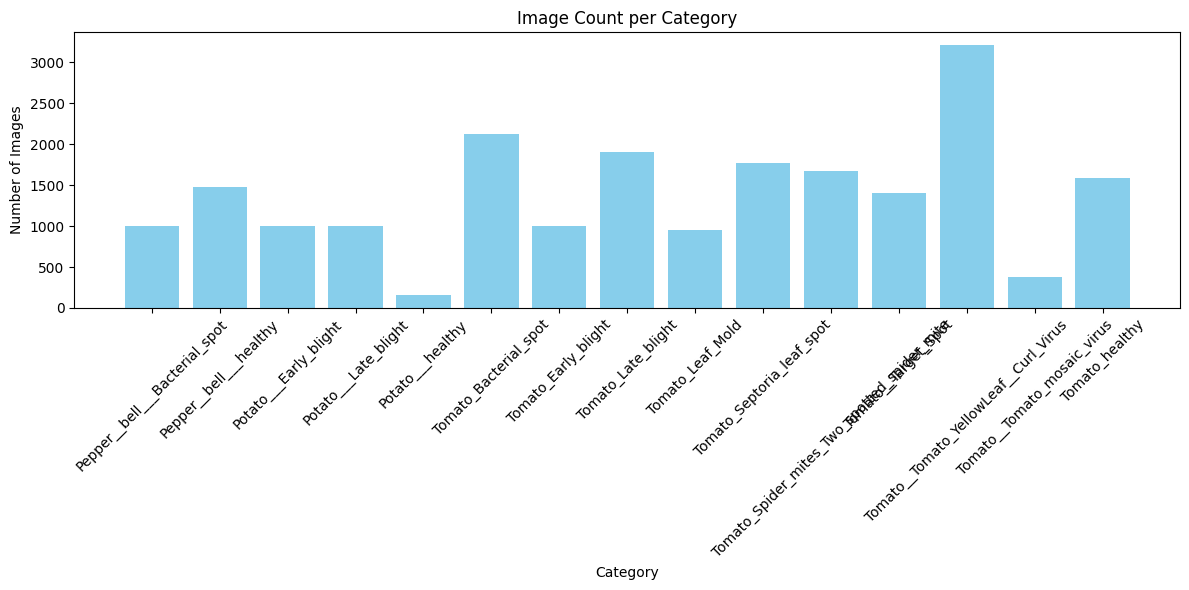

In [ ]:
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/MyDrive/NNDL Final Project/PlantVillage"

# List categories
categories = sorted(os.listdir(dataset_path))
image_counts = []

# Count images in each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_counts.append(len(image_files))
    print(f"{category}: {len(image_files)} images")

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, image_counts, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Image Count per Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Cleaning the dataset
import os
from PIL import Image
valid_extensions = ('.jpg', '.jpeg', '.png')

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)

    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)

        # Check if the file has a valid image extension
        if not filename.lower().endswith(valid_extensions):
            print(f"Removing non-image file: {file_path}")
            os.remove(file_path)
            continue

        # Try opening the image to catch corrupted ones
        try:
            img = Image.open(file_path)
            img.verify()  # This will raise an exception for corrupt images
        except Exception as e:
            print(f"Removing corrupted image: {file_path} | Reason: {e}")
            os.remove(file_path)

Removing non-image file: /content/drive/MyDrive/NNDL Final Project/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/svn-r6Yb5c


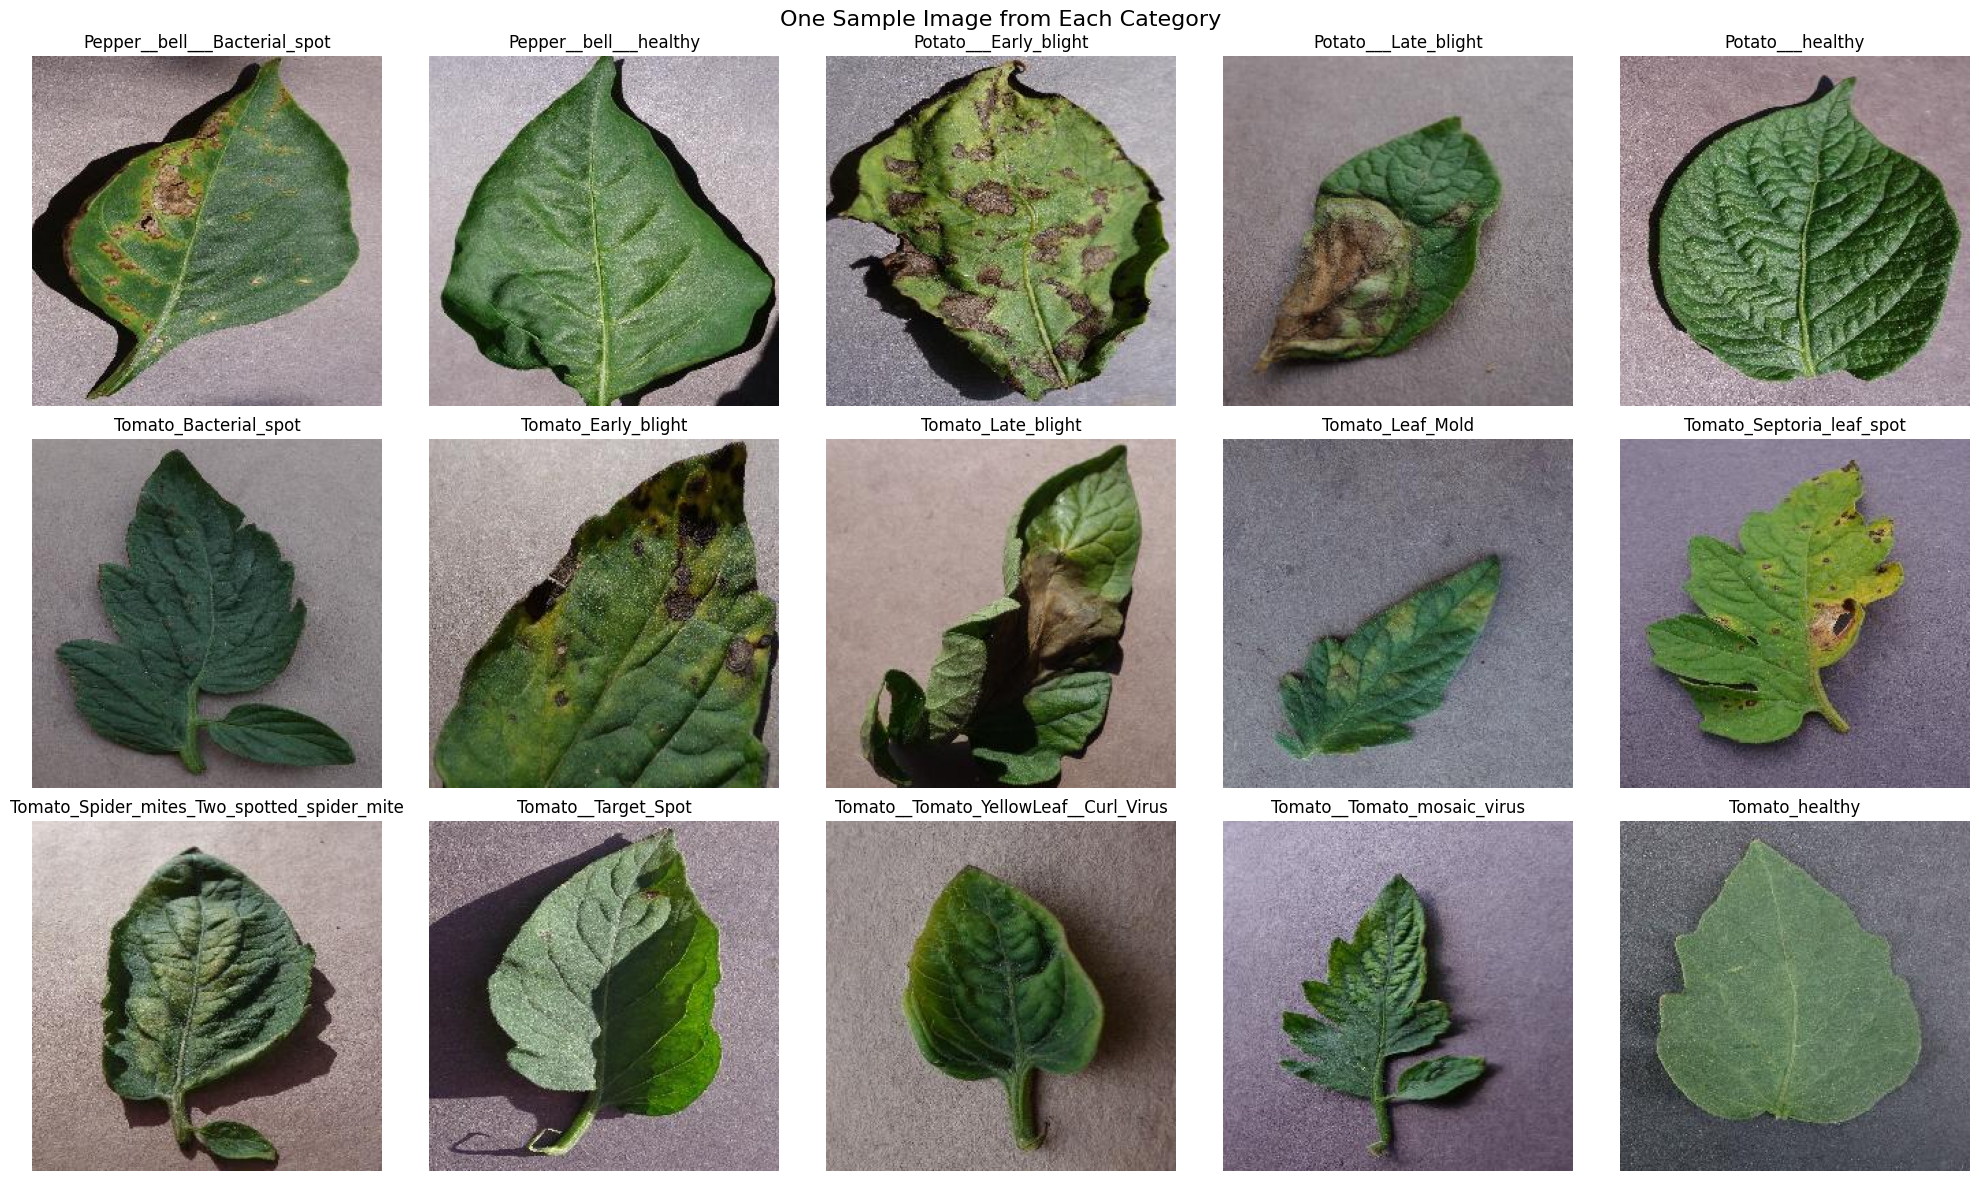

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/NNDL Final Project/PlantVillage"


categories = sorted(os.listdir(dataset_path))

valid_samples = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        first_image_path = os.path.join(category_path, image_files[0])
        valid_samples.append((category, first_image_path))

num_images = len(valid_samples)
rows = 3
cols = (num_images + rows - 1) // rows  # ceil division

plt.figure(figsize=(cols * 4, rows * 4))

for i, (category, img_path) in enumerate(valid_samples):
    img = Image.open(img_path)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(category)

plt.suptitle("One Sample Image from Each Category", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
from pathlib import Path

# Get class names (folder names)
classes = sorted(os.listdir(dataset_path))
# Initialize empty lists
images_list = []
labels_list = []

In [ ]:
#Preprocessing of Image & Label List Creation
import os
import numpy as np
from PIL import Image
from pathlib import Path

# Loop through each class
for index, label in enumerate(classes):
    image_folder = dataset_path / label
    for image_path in image_folder.glob("*"):
        try:
            # Load image
            image = Image.open(image_path)

            # Convert to RGB if not already
            if image.mode != 'RGB':
                image = image.convert('RGB')

            # Resize to 64x64
            image = image.resize((64, 64))

            # Convert to numpy array and append
            images_list.append(np.array(image))
            labels_list.append(index)
        except Exception as e:
            print(f"Failed to process {image_path}: {e}")

print("Total Images:", len(images_list))
print("Total Labels:", len(labels_list))


Total Images: 20638
Total Labels: 20638


In [ ]:
print("Type of images_list:", type(images_list))
print("Shape of image in images_list:", images_list[0].shape)
print("Type of image in images_list:", type(images_list[0]))

Type of images_list: <class 'list'>
Shape of image in images_list: (64, 64, 3)
Type of image in images_list: <class 'numpy.ndarray'>


In [ ]:
#Preprocessing of Image & Label List Convertion to NumPy Arrays
images_list = np.array(images_list)
labels_list = np.array(labels_list)

In [ ]:
#Split Data to Train, Test & Validation
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(images_list, labels_list, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("X_val:", X_val.shape)
print("Pixel values of the first pixel (RGB) of image (BEFORE NORMALIZATION):", X_train[0][0][0])

X_train: (14446, 64, 64, 3)
X_test: (3096, 64, 64, 3)
X_val: (3096, 64, 64, 3)
Pixel values of the first pixel (RGB) of image (BEFORE NORMALIZATION): [129 129 129]


In [ ]:
# Data Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0
print("Pixel values of the first pixel (RGB) of image (AFTER NORMALIZATION):", X_train[0][0][0])

Pixel values of the first pixel (RGB) of image (AFTER NORMALIZATION): [0.50588235 0.50588235 0.50588235]


In [ ]:
# Define augmentation parameters
test_augmentations = ImageDataGenerator()

# Create a generator to pass the data in batches with the augmentations
test_generator = test_augmentations.flow(
    X_test,
    y_test,
    batch_size=16)

**Dataset splitting**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=30,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2         # Split for validation
)

# Train generator
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/NNDL Final Project/PlantVillage",
    target_size=(64, 64),
    batch_size=16,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/NNDL Final Project/PlantVillage",
    target_size=(64, 64),
    batch_size=16,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


(64, 64, 3)


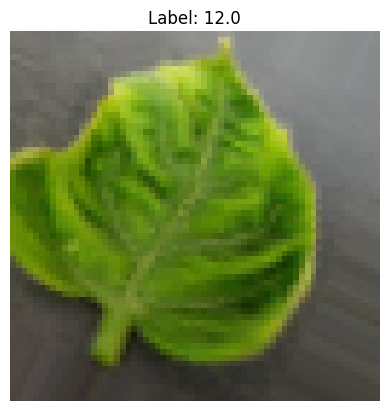

In [ ]:

# Take the first image batch and the labels from train generator
images_batch, labels_batch = next(train_generator)
# Take the first image from the batch
image_to_preview = images_batch[0]

print(image_to_preview.shape)
# Display the image
plt.imshow(image_to_preview)
plt.title(f"Label: {labels_batch[0]}")
plt.axis('off')
plt.show()

In [ ]:
#Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

Custom CNN model

In [ ]:
import keras
input_shape = X_train.shape[1:]

model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),

    keras.layers.Dense(64, activation="relu"),
    # Output layer
    # 15 neurons, corresponding to the number of classes
    keras.layers.Dense(15, activation="softmax")
])
# Summary of the model
model_1.summary()

# Adam optimizer, Loss function for multi-class classification
model_1.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │           975 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 823,247 (3.14 MB)

 Trainable params: 823,247 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
history_1 = model_1.fit(train_generator,
                        epochs=10,
                        validation_data=test_generator,
                        callbacks=[early_stopping, lr_scheduler]
                       )

Epoch 1/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.3698 - loss: 1.9236

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1033/1033 ━━━━━━━━━━━━━━━━━━━━ 102s 97ms/step - accuracy: 0.3699 - loss: 1.9232 - val_accuracy: 0.0959 - val_loss: 27.7035 - learning_rate: 0.0010
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.7143 - loss: 0.8612 - val_accuracy: 0.0959 - val_loss: 39.1388 - learning_rate: 0.0010
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.7618 - loss: 0.7051 - val_accuracy: 0.0959 - val_loss: 39.0171 - learning_rate: 0.0010
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.7974 - loss: 0.5952 - val_accuracy: 0.0959 - val_loss: 41.8690 - learning_rate: 0.0010
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.8151 - loss: 0.5448 - val_accuracy: 0.0959 - val_loss: 47.0574 - learning_rate: 0.0010
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 97s 94ms/step - accuracy: 0.8381 - loss: 0.4748 - val_accuracy: 0.0959 - val_loss: 50.6884 - learning_rate: 0.0010
Epoch 7/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 98s 95ms/step - accuracy: 

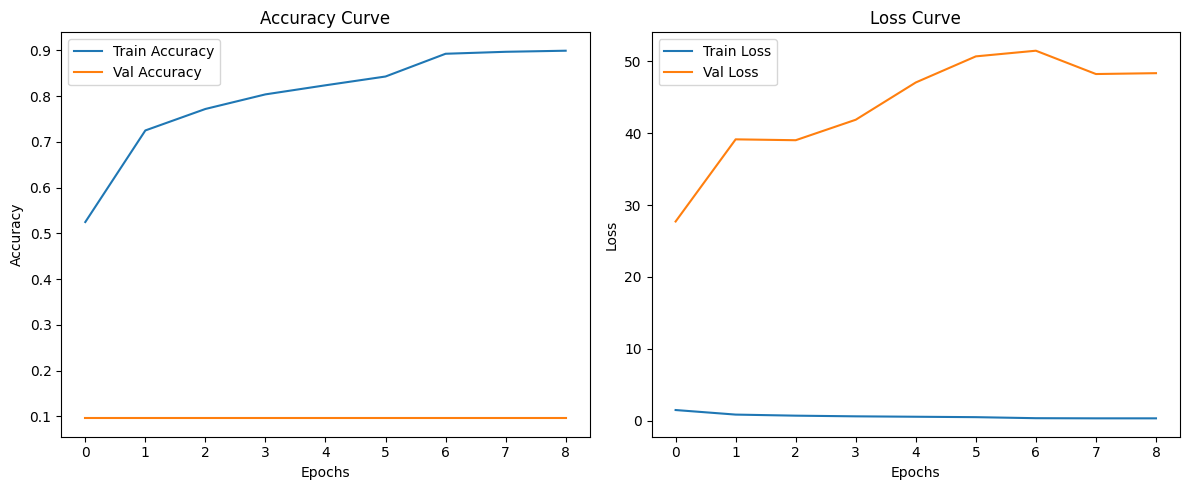

In [ ]:
#Plot Loss and Accuracy Curves

import matplotlib.pyplot as plt

def plot_training_curves(history):
    # Accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history_1)


In [ ]:

#Evaluation on Test Set
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7199 - loss: 0.8424
Test Loss: 0.8758
Test Accuracy: 0.7083


In [ ]:
#Classification Report
from sklearn.metrics import classification_report
import numpy as np

# Predict classes
y_pred_probs = model_1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=classes))


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.74      0.55      0.63       146
                     Pepper__bell___healthy       0.65      0.92      0.76       235
                      Potato___Early_blight       0.60      0.95      0.74       175
                       Potato___Late_blight       0.56      0.32      0.41       155
                           Potato___healthy       0.00      0.00      0.00        23
                      Tomato_Bacterial_spot       0.58      0.98      0.73       311
                        Tomato_Early_blight       0.53      0.22      0.31       144
                         Tomato_Late_blight       0.66      0.72      0.69       297
                           Tomato_Leaf_Mold       0.79      0.36      0.50       139
                  Tomato_Septoria_leaf_spot       0.65      0.47      0.54       243
Tomato_Spider_mites_Two_

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


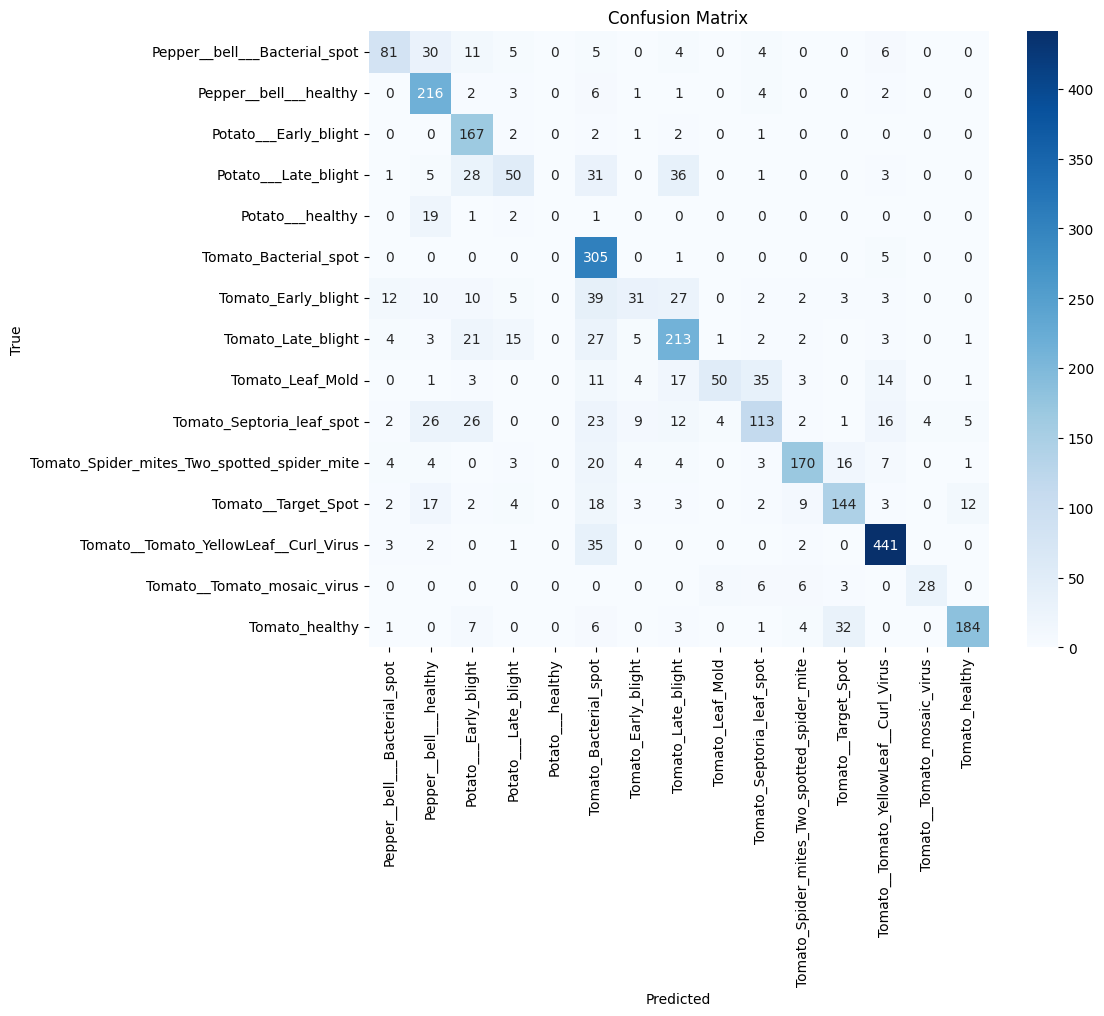

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes,
            yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


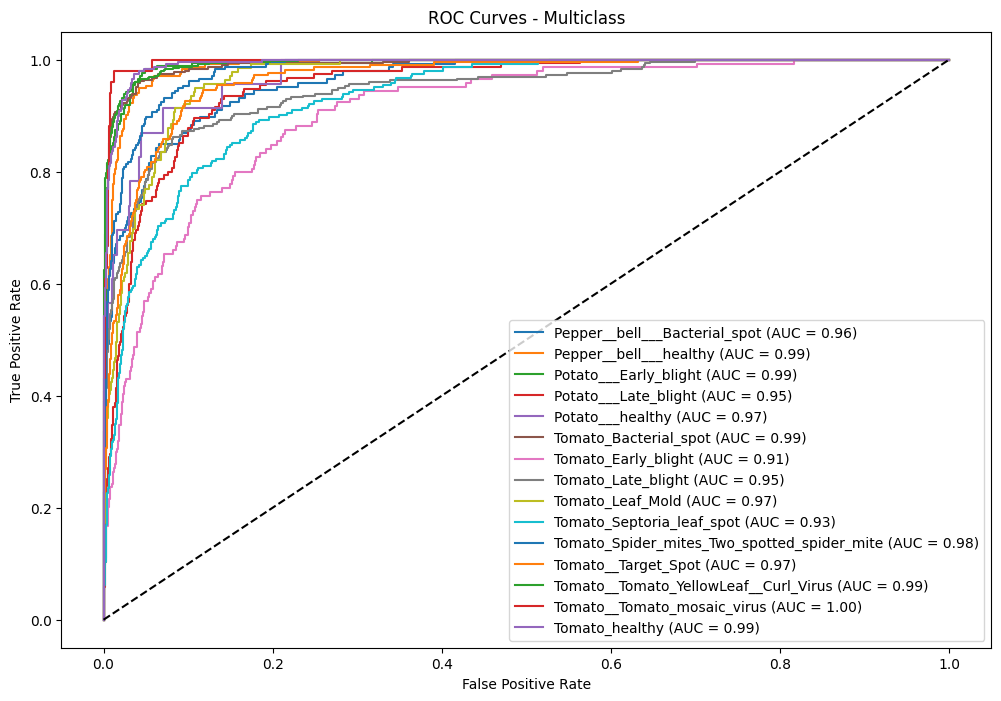

In [ ]:
# ROC Curve (One-vs-Rest for Multiclass)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=range(len(classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(12, 8))

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves - Multiclass")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Self Attention CNN model

In [ ]:
import keras
from keras import layers
from tensorflow.keras.models import Model

input_shape = (64, 64, 3)
num_classes = 15

# Input layer
inputs = layers.Input(shape=input_shape)

# Convolutional layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2))(x)  # Output: (32, 32, 32)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)  # Output: (16, 16, 64)

# Reshape to (batch_size, sequence_len, channels) for attention
x = layers.Reshape((-1, x.shape[-1]))(x)  # Shape: (batch_size, 256, 64)

# Self-Attention
attention_output = layers.MultiHeadAttention(num_heads=2, key_dim=x.shape[-1])(x, x)
x = layers.Add()([x, attention_output])  # Skip connection
x = layers.LayerNormalization()(x)

# Global Average Pooling
x = layers.GlobalAveragePooling1D()(x)

# Dense layers
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Define and compile model
attention_cnn_model = Model(inputs, outputs)
attention_cnn_model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

attention_cnn_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 256, 64)   │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 64)   │     33,216 │ reshape[0][0],    │
│ (MultiHeadAttentio… │                   │            │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256, 64)   │          0 │ reshape[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 256, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 15)        │        975 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 57,871 (226.06 KB)

 Trainable params: 57,871 (226.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = attention_cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 168s 366ms/step - accuracy: 0.2735 - loss: 2.2271 - val_accuracy: 0.6027 - val_loss: 1.2141
Epoch 2/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 158s 350ms/step - accuracy: 0.6592 - loss: 1.0240 - val_accuracy: 0.7316 - val_loss: 0.8031
Epoch 3/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 159s 351ms/step - accuracy: 0.7441 - loss: 0.7515 - val_accuracy: 0.8088 - val_loss: 0.5771
Epoch 4/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 160s 354ms/step - accuracy: 0.8039 - loss: 0.5756 - val_accuracy: 0.8172 - val_loss: 0.5335
Epoch 5/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 161s 357ms/step - accuracy: 0.8135 - loss: 0.5278 - val_accuracy: 0.8589 - val_loss: 0.4412
Epoch 6/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 158s 350ms/step - accuracy: 0.8495 - loss: 0.4349 - val_accuracy: 0.8337 - val_loss: 0.4857
Epoch 7/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 160s 353ms/step - accuracy: 0.8727 - loss: 0.3736 - val_accuracy: 0.8660 - val_loss: 0.3985
Epoch 8/10
452/452 ━━━━━━━━━━━━━━━━━━━━ 161s 356ms/step - accuracy: 0.8664 -

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Predict class probabilities on test set
y_pred_probs = attention_cnn_model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate classification report
print(classification_report(y_test, y_pred_classes))

97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.94      0.97      0.95       235
           2       0.96      0.96      0.96       175
           3       0.96      0.77      0.85       155
           4       0.93      0.61      0.74        23
           5       0.89      0.97      0.93       311
           6       0.88      0.67      0.76       144
           7       0.87      0.85      0.86       297
           8       0.96      0.78      0.86       139
           9       0.85      0.94      0.89       243
          10       0.86      0.94      0.90       236
          11       0.91      0.89      0.90       219
          12       0.92      0.99      0.95       484
          13       0.96      0.92      0.94        51
          14       0.99      0.96      0.97       238

    accuracy                           0.91      3096
   macro avg       0.92      0.87      0

Cross Attention CNN model

In [ ]:
import keras
from keras import layers
from tensorflow.keras.models import Model

input_shape = (64, 64, 3)
num_classes = 15

# Input
inputs = layers.Input(shape=input_shape)

# Convolutional layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((2, 2))(x)  # Now shape: (32, 32, 32)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)  # Now shape: (16, 16, 64)

# Reshape for attention: (B, H*W, C)
x_reshaped = layers.Reshape((16 * 16, 64))(x)  # Shape: (B, 256, 64)

# Cross-Attention: Query from one projection, Key/Value from another
query = layers.Dense(64)(x_reshaped)           # Shape: (B, 256, 64)
key_value = layers.Dense(64)(x_reshaped)       # Optionally, transform for flexibility

attn_output = layers.MultiHeadAttention(num_heads=2, key_dim=64)(query, key_value)

# Residual connection and normalization
x = layers.Add()([x_reshaped, attn_output])
x = layers.LayerNormalization()(x)

# Global average pooling & Dense layers
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Final model
cross_attention_model = Model(inputs, outputs)

# Compile the model
cross_attention_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# Show the model structure
cross_attention_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 64,    │        896 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 16, 16,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 256, 64)   │          0 │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256, 64)   │      4,160 │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 256, 64)   │      4,160 │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 256, 64)   │     33,216 │ dense_10[0][0],   │
│ (MultiHeadAttentio… │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 256, 64)   │          0 │ reshape_2[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 256, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      4,160 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 15)        │        975 │ dense_12[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 66,191 (258.56 KB)

 Trainable params: 66,191 (258.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the cross-attention model
history_cross = cross_attention_model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 172s 375ms/step - accuracy: 0.2476 - loss: 2.3224 - val_accuracy: 0.5042 - val_loss: 1.4716
Epoch 2/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 165s 365ms/step - accuracy: 0.6354 - loss: 1.0895 - val_accuracy: 0.7203 - val_loss: 0.8127
Epoch 3/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 162s 359ms/step - accuracy: 0.7602 - loss: 0.6992 - val_accuracy: 0.8007 - val_loss: 0.5871
Epoch 4/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 163s 361ms/step - accuracy: 0.8101 - loss: 0.5534 - val_accuracy: 0.8211 - val_loss: 0.5534
Epoch 5/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 163s 360ms/step - accuracy: 0.8420 - loss: 0.4599 - val_accuracy: 0.8550 - val_loss: 0.4236
Epoch 6/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 167s 370ms/step - accuracy: 0.8722 - loss: 0.3873 - val_accuracy: 0.8947 - val_loss: 0.3325
Epoch 7/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 165s 365ms/step - accuracy: 0.8756 - loss: 0.3585 - val_accuracy: 0.8931 - val_loss: 0.3235
Epoch 8/8
452/452 ━━━━━━━━━━━━━━━━━━━━ 164s 362ms/step - accuracy: 0.8930 - loss: 0

In [ ]:

from sklearn.metrics import classification_report
import numpy as np

# Predict class probabilities on test set
y_pred_probs = cross_attention_model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       146
           1       0.98      0.88      0.93       235
           2       0.95      0.92      0.93       175
           3       0.84      0.94      0.89       155
           4       0.61      0.61      0.61        23
           5       0.89      0.96      0.93       311
           6       0.58      0.86      0.69       144
           7       0.91      0.82      0.87       297
           8       0.90      0.79      0.84       139
           9       0.87      0.88      0.88       243
          10       0.89      0.74      0.81       236
          11       0.71      0.85      0.78       219
          12       0.99      0.95      0.97       484
          13       0.95      0.82      0.88        51
          14       0.95      0.99      0.97       238

    accuracy                           0.88      3096
   macro avg   

In [ ]:
acc_custom_cnn = model_1.evaluate(X_test, y_test, verbose=0)[1]
acc_self_attention = attention_cnn_model.evaluate(X_test, y_test, verbose=0)[1]
acc_cross_attention = cross_attention_model.evaluate(X_test, y_test, verbose=0)[1]

Accuracy Comparision

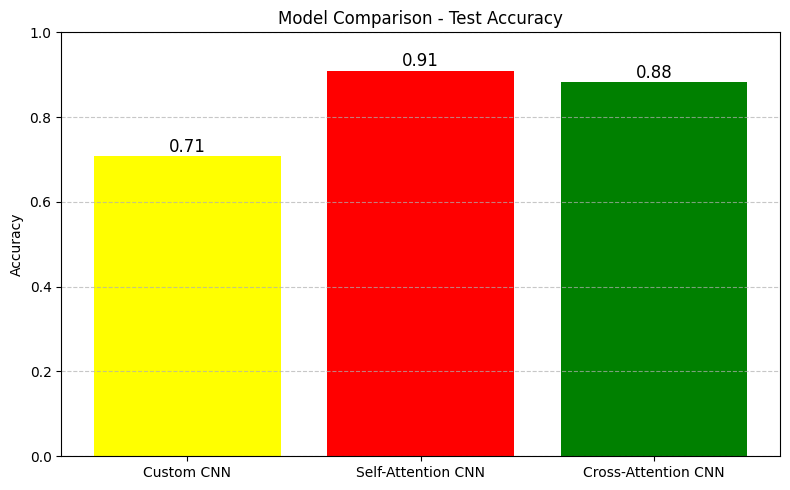

In [ ]:
import matplotlib.pyplot as plt

accuracies = [acc_custom_cnn, acc_self_attention, acc_cross_attention]
model_names = ['Custom CNN', 'Self-Attention CNN', 'Cross-Attention CNN']

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['yellow', 'red', 'green'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()